In [1]:
import PyPDF2
import textract
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import glob
import os

In [2]:
# the following functions were pulled from here: https://www.dev2qa.com/how-to-extract-text-from-pdf-in-python/
# This function will extract and return the pdf file text content.
def extractPdfText(filePath=''):

    # Open the pdf file in read binary mode.
    fileObject = open(filePath, 'rb')

    # Create a pdf reader .
    pdfFileReader = PyPDF2.PdfFileReader(fileObject)

    # Get total pdf page number.
    totalPageNumber = pdfFileReader.numPages

    # Print pdf total page number.
    print('This pdf file contains totally ' + str(totalPageNumber) + ' pages.')

    currentPageNumber = 0
    text = ''

    # Loop in all the pdf pages.
    while(currentPageNumber < totalPageNumber ):

        # Get the specified pdf page object.
        pdfPage = pdfFileReader.getPage(currentPageNumber)

        # Get pdf page text.
        text = text + pdfPage.extractText()

        # Process next page.
        currentPageNumber += 1

    if(text == ''):
        # If can not extract text then use ocr lib to extract the scanned pdf file.
        text = textract.process(filePath, method='tesseract', encoding='utf-8')
       
    return text

In [3]:
# This function will remove all stop words and punctuations in the text and return a list of keywords.
def extractKeywords(text):
    # Split the text words into tokens
    wordTokens = word_tokenize(text)
    
    # Remove punctuation in the list.
    punctuations = ['(',')',';',':','[',']',',','-', '//', '.']

    # Get all stop words in english.
    stopWords = stopwords.words('english')
    
    # Common numbers to remove
    common_numbers = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20',
                     '21','22','23','24','25','26','27','28','29','30']

    # Below list comprehension will return only keywords tha are not in stop words and punctuations
    keywords = [word for word in wordTokens if not word in stopWords and not word in punctuations 
                and not word in common_numbers]
   
    return keywords

In [4]:
# test out the functions
pdfFilePath = 'C:/Users/Jordan/Desktop/PatentActionForecast/Complaints_Study/pdfs/cacd-2-17-cv-01161-1.pdf'
   
pdfText = extractPdfText(pdfFilePath)
print('There are ' + str(pdfText.__len__()) + ' words in the pdf file.')
#print(pdfText)

keywords = extractKeywords(pdfText)
print('There are ' + str(keywords.__len__()) + ' keywords in the pdf file.')
#print(keywords) 

This pdf file contains totally 12 pages.
There are 14653 words in the pdf file.
There are 1149 keywords in the pdf file.


In [5]:
# test out Freqdist on the text
from nltk.probability import FreqDist
fdist = FreqDist(keywords)
print(fdist.most_common(10))

[('SPIGEN', 24), ('Design', 24), ('Spigen', 23), ('Patents', 19), ('Defendants', 15), ('FOR', 13), ('PATENT', 13), ('INFRINGEMENT', 13), ('ULTRAPROOF', 12), ('COMPLAINT', 12)]


In [6]:
# Create a corpus of all of the pdfs in the folder

# first specify a filepath
file_path = 'C:/Users/Jordan/Desktop/PatentActionForecast/Complaints_Study/pdfs/*'

corpus = []


for file in glob.glob(file_path):
    pdfText = extractPdfText(file)
    print('Adding file: {}'.format(file))
    print('There are ' + str(pdfText.__len__()) + ' words in the pdf file.')
    keywords = extractKeywords(pdfText)
    print('There are ' + str(keywords.__len__()) + ' keywords in the pdf file.')
    corpus.append(keywords)
    

This pdf file contains totally 12 pages.
Adding file: C:/Users/Jordan/Desktop/PatentActionForecast/Complaints_Study/pdfs\cacd-2-17-cv-01161-1.pdf
There are 14653 words in the pdf file.
There are 1149 keywords in the pdf file.
This pdf file contains totally 16 pages.
Adding file: C:/Users/Jordan/Desktop/PatentActionForecast/Complaints_Study/pdfs\cacd-2-17-cv-01177-2.pdf
There are 33090 words in the pdf file.
There are 3064 keywords in the pdf file.
This pdf file contains totally 4 pages.
Adding file: C:/Users/Jordan/Desktop/PatentActionForecast/Complaints_Study/pdfs\cand-3-17-cv-00650-1.pdf
There are 5384 words in the pdf file.
There are 453 keywords in the pdf file.
This pdf file contains totally 23 pages.
Adding file: C:/Users/Jordan/Desktop/PatentActionForecast/Complaints_Study/pdfs\casd-3-17-cv-00245-1.pdf
There are 45384 words in the pdf file.
There are 4422 keywords in the pdf file.
This pdf file contains totally 13 pages.
Adding file: C:/Users/Jordan/Desktop/PatentActionForecast/

Adding file: C:/Users/Jordan/Desktop/PatentActionForecast/Complaints_Study/pdfs\txed-4-17-cv-00111-1.pdf
There are 8966 words in the pdf file.
There are 941 keywords in the pdf file.
This pdf file contains totally 6 pages.
Adding file: C:/Users/Jordan/Desktop/PatentActionForecast/Complaints_Study/pdfs\txed-5-17-cv-00014-1.pdf
There are 10166 words in the pdf file.
There are 981 keywords in the pdf file.
This pdf file contains totally 5 pages.
Adding file: C:/Users/Jordan/Desktop/PatentActionForecast/Complaints_Study/pdfs\txed-5-17-cv-00028-1.pdf
There are 7888 words in the pdf file.
There are 762 keywords in the pdf file.
This pdf file contains totally 5 pages.
Adding file: C:/Users/Jordan/Desktop/PatentActionForecast/Complaints_Study/pdfs\txed-5-17-cv-00029-1.pdf
There are 7824 words in the pdf file.
There are 744 keywords in the pdf file.
This pdf file contains totally 5 pages.
Adding file: C:/Users/Jordan/Desktop/PatentActionForecast/Complaints_Study/pdfs\txed-5-17-cv-00030-1.pdf
Th

Adding file: C:/Users/Jordan/Desktop/PatentActionForecast/Complaints_Study/pdfs\txsd-4-17-cv-00455-1.pdf
There are 17517 words in the pdf file.
There are 1701 keywords in the pdf file.
This pdf file contains totally 32 pages.
Adding file: C:/Users/Jordan/Desktop/PatentActionForecast/Complaints_Study/pdfs\txwd-1-17-cv-00091-1.pdf
There are 49220 words in the pdf file.
There are 5089 keywords in the pdf file.
This pdf file contains totally 13 pages.
Adding file: C:/Users/Jordan/Desktop/PatentActionForecast/Complaints_Study/pdfs\txwd-5-17-cv-00098-1.pdf
There are 17913 words in the pdf file.
There are 1771 keywords in the pdf file.


In [10]:
# need to flatten the corpus
flat_corpus = [item for sublist in corpus for item in sublist]

# create FreqDist object
fdist_corpus = FreqDist(flat_corpus)

In [13]:
print(type(fdist_corpus))
print(fdist_corpus.most_common(30))

<class 'nltk.probability.FreqDist'>
[('Patent', 807), ('patent', 737), ('Accused', 709), ('and/or', 647), ('Products', 632), ('The', 596), ('infringement', 530), ('information', 511), ('U.S.C', 439), ('least', 426), ('United', 415), ('States', 415), ('belief', 397), ('§', 392), ('use', 374), ('data', 365), ('including', 363), ('35', 348), ('Defendant', 338), ('infringe', 286), ('one', 277), ('No', 275), ('YETI', 265), ('Plaintiff', 260), ('claim', 259), ('On', 255), ('sell', 249), ('directly', 249), ('LG', 241), ('Inc.', 238)]


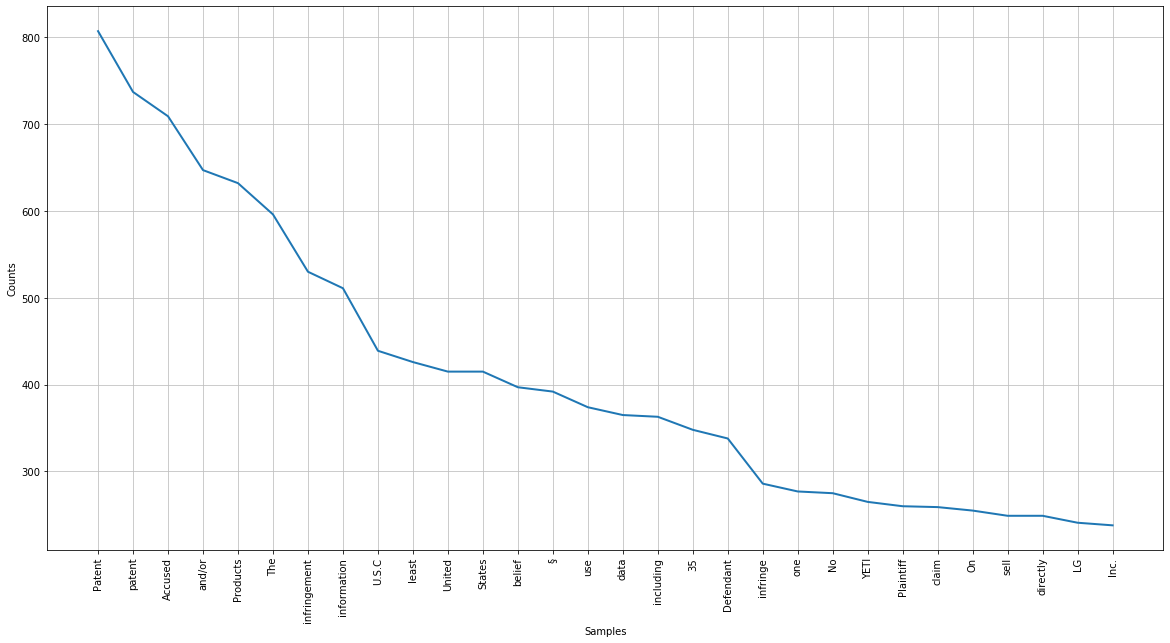

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (20, 10)

fdist_corpus.plot(30, cumulative=False)